In [1]:
import pandas as pd
import sklearn

df = pd.read_csv (r'dataset\LIWC-track-1-essay-empathy-train.csv')
print (df)

               message_id        response_id  empathy  distress  empathy_bin  \
0     R_1hGrPtWM4SumG0U_1  R_1hGrPtWM4SumG0U    5.667     4.375            1   
1     R_1hGrPtWM4SumG0U_2  R_1hGrPtWM4SumG0U    4.833     4.875            1   
2     R_1hGrPtWM4SumG0U_3  R_1hGrPtWM4SumG0U    5.333     3.500            1   
3     R_1hGrPtWM4SumG0U_4  R_1hGrPtWM4SumG0U    4.167     5.250            1   
4     R_1hGrPtWM4SumG0U_5  R_1hGrPtWM4SumG0U    5.333     4.625            1   
...                   ...                ...      ...       ...          ...   
1855  R_DHy2Rcz9Hym8jgl_1  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1856  R_DHy2Rcz9Hym8jgl_2  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1857  R_DHy2Rcz9Hym8jgl_3  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1858  R_DHy2Rcz9Hym8jgl_4  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   
1859  R_DHy2Rcz9Hym8jgl_5  R_DHy2Rcz9Hym8jgl    1.000     1.000            0   

      distress_bin emotion_label  \
0  

In [5]:
#draw_heatmap of correlation matrix
import pandas as pd
from heatmap import *
corrMatrix = df.corr()
draw_heatmap(corrMatrix,101,115)


In [2]:
#process all the textual data

from textclean import *
df1 = process_text(df)
df1.to_csv('dataset\LIWC-track-1-essay-empathy-train.csv')

PermissionError: [Errno 13] Permission denied: 'dataset\\LIWC-track-1-essay-empathy-train.csv'

In [5]:
#Concate all the features
#dff = pd.concat([df1, df[df.columns[8:]]], axis=1)
#print(dff)

In [6]:
df['emotion_label']
#sadness   5
#joy       3
#neutral   4 
#fear      2
#disgust   1
#anger     0

0       5
1       3
2       4
3       2
4       4
       ..
1855    3
1856    0
1857    1
1858    6
1859    5
Name: emotion_label, Length: 1860, dtype: int64

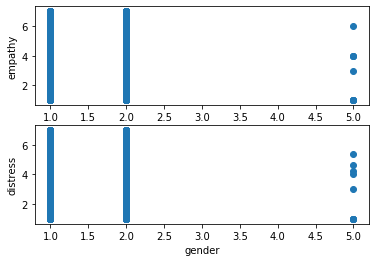

In [6]:
from scatter import *
#use scatterr fuction to plot graph between our selected variable and empathy/destress
scatterr(df['gender'],'gender')

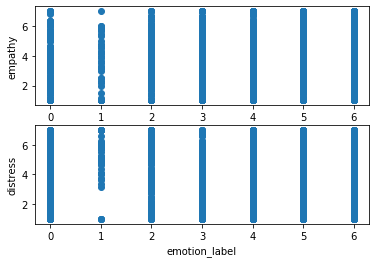

In [7]:
scatterr(df['emotion_label'],'emotion_label')

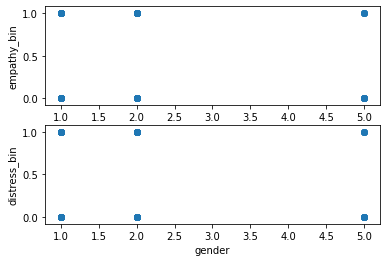

In [3]:
#use scatterr_bin function to plot graph between our selected variable and empathy_bin/distress_bin
scatterr_bin(df['gender'],'gender')

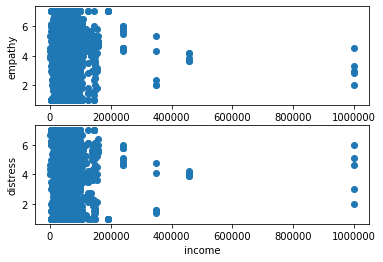

In [5]:
scatterr(df['income'],'income')

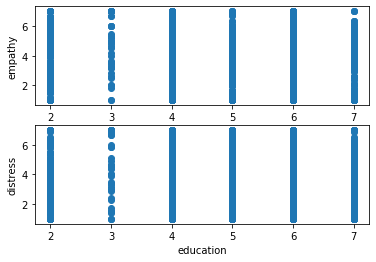

In [7]:
scatterr(df['education'],'education')

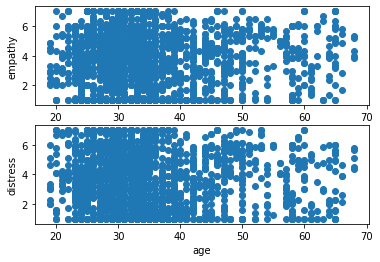

In [8]:
scatterr(df['age'],'age')

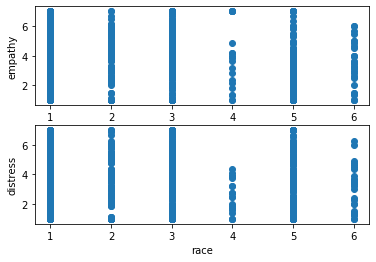

In [9]:
scatterr(df['race'],'race')

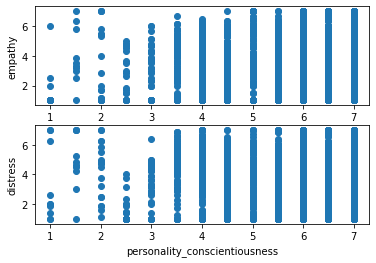

In [10]:
scatterr(df['personality_conscientiousness'],'personality_conscientiousness')

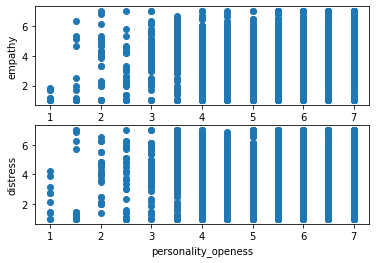

In [11]:
scatterr(df['personality_openess'],'personality_openess')

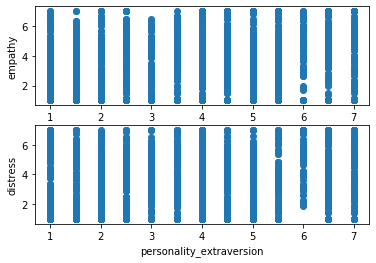

In [12]:
scatterr(df['personality_extraversion'],'personality_extraversion')

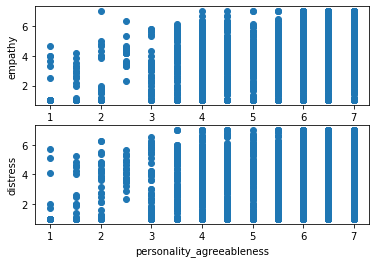

In [13]:
scatterr(df['personality_agreeableness'],'personality_agreeableness')

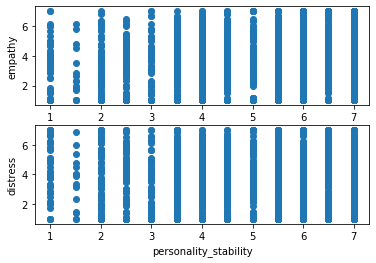

In [44]:
scatterr(df['personality_stability'],'personality_stability')


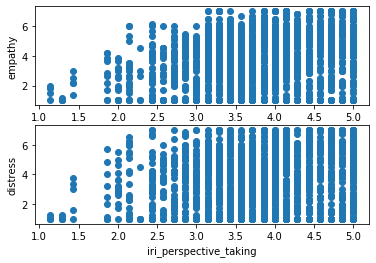

In [45]:
scatterr(df['iri_perspective_taking'],'iri_perspective_taking')

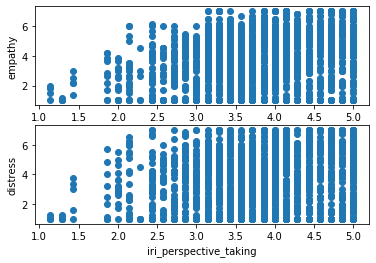

In [46]:
scatterr(df['iri_perspective_taking'],'iri_perspective_taking')

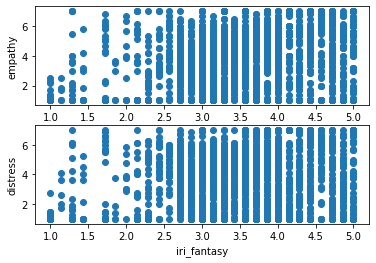

In [47]:
scatterr(df['iri_fantasy'],'iri_fantasy')

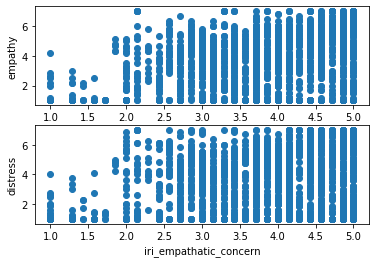

In [48]:
scatterr(df['iri_empathatic_concern'],'iri_empathatic_concern')

In [2]:
import numpy as np
import scipy.stats

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_absolute_error, matthews_corrcoef
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select 1a subset of features
    fs = SelectKBest(score_func=f_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    xp = fs.get_params(deep=True)
    print(xp)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [4]:
x = df[df.columns[7:]] 
print(x)

      emotion_label  gender  education  race  age  income  \
0                 5       1          4     1   33   50000   
1                 3       1          4     1   33   50000   
2                 4       1          4     1   33   50000   
3                 2       1          4     1   33   50000   
4                 4       1          4     1   33   50000   
...             ...     ...        ...   ...  ...     ...   
1855              3       2          4     3   34   30000   
1856              0       2          4     3   34   30000   
1857              1       2          4     3   34   30000   
1858              6       2          4     3   34   30000   
1859              5       2          4     3   34   30000   

      personality_conscientiousness  personality_openess  \
0                               6.0                  5.0   
1                               6.0                  5.0   
2                               6.0                  5.0   
3                          

In [5]:
y = df['empathy']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=1)


In [7]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

{'k': 10, 'score_func': <function f_regression at 0x0000024056453318>}


In [8]:
print(X_train_fs[:5])
print(X_train[:5])

[[5.    1.    6.5   7.    6.5   2.5   4.5   3.429 3.714 3.143]
 [0.    1.    7.    5.5   1.5   7.    7.    5.    4.    5.   ]
 [4.    1.    4.5   5.5   3.    5.5   4.    3.714 3.143 4.   ]
 [1.    3.    6.5   5.    6.5   7.    7.    4.571 3.857 4.429]
 [5.    1.    6.5   5.    5.    5.    4.5   4.714 4.857 4.429]]
      emotion_label  gender  education  race  age  income  \
478               5       1          6     1   44   14500   
1759              0       1          5     1   29   25000   
1528              4       1          6     1   27   74000   
1507              1       1          7     3   30  145000   
231               5       2          3     1   24   50000   

      personality_conscientiousness  personality_openess  \
478                             6.5                  7.0   
1759                            7.0                  5.5   
1528                            4.5                  5.5   
1507                            6.5                  5.0   
231              

In [9]:
from keras import backend as K
import tensorflow as tf
from sklearn import metrics

def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)

Using TensorFlow backend.


In [ ]:
conda install -c conda-forge tensorflow=1.14

In [26]:
def correlation_coefficient(y_true, y_pred):
    mx = tf.math.reduce_mean(x)
    my = tf.math.reduce_mean(y)
    xm, ym = x-mx, y-my
    r_num = tf.math.reduce_mean(tf.multiply(xm,ym))        
    r_den = tf.math.reduce_std(xm) * tf.math.reduce_std(ym)
    return r_num / r_den

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(4000, input_dim= (1860 * 15), kernel_initializer='normal', activation='relu'))
#model.add(Dense(2000, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss=correlation_coefficient_loss, optimizer='adam', metrics=[matthews_corrcoef])

TypeError: len is not well defined for symbolic Tensors. (dense_4_target:0) Please call `x.shape` rather than `len(x)` for shape information.

In [59]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.003


In [60]:
yhat

array([ 1.91196017e-16, -9.23454022e-17, -2.35214626e-16, -5.84671200e-17,
        4.99591687e-17, -1.06538042e-17,  5.29888633e-17,  2.66257502e-16,
       -4.67205268e-16,  1.05036639e-16, -4.29057831e-17,  4.48573470e-17,
        4.20995704e-16, -2.12965930e-16, -2.31990642e-16,  2.69937718e-16,
        2.88426401e-16,  7.62419641e-17,  2.12503626e-17,  1.64307803e-16,
       -1.07415812e-16,  2.22826098e-16,  4.25093988e-18,  2.60779245e-16,
        1.20632671e-17, -2.09034179e-16,  2.36642303e-17, -3.43960103e-16,
        8.37576536e-17, -7.68187597e-17,  2.75193063e-16,  2.70805080e-16,
       -1.23815888e-16, -1.11672824e-17, -2.61538187e-16, -6.86299975e-17,
       -2.47871168e-16,  1.98648389e-16,  1.16140604e-16, -1.73363927e-16,
        4.69685055e-17, -2.25131545e-16, -2.72134745e-17,  1.65283585e-16,
        3.04067535e-16,  3.47435622e-16, -7.30752264e-17, -2.78353729e-17,
       -1.33653505e-16,  1.81874914e-16,  1.11398737e-16, -2.24429850e-17,
       -2.53989538e-17,  